# Problem Statement

A classic problem in the field of pattern recognition is that of handwritten digit recognition. Suppose that you have images of handwritten digits ranging from 0-9 written by various people in boxes of a specific size - similar to the application forms in banks and universities.

# Goal

The goal is to develop a model that can correctly identify the digit (between 0-9) written in an image using SVC


### Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")
warnings.warn("once")

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns



Pandas options

In [3]:
# Set Pandas options for better display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth', 200)

### Read data

In [4]:
data = pd.read_csv("train.csv")

- Data Analysis

In [5]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,...,pixel534,pixel535,pixel536,pixel537,pixel538,pixel539,pixel540,pixel541,pixel542,pixel543,pixel544,pixel545,pixel546,pixel547,pixel548,pixel549,pixel550,pixel551,pixel552,pixel553,pixel554,pixel555,pixel556,pixel557,pixel558,pixel559,pixel560,pixel561,pixel562,pixel563,pixel564,pixel565,pixel566,pixel567,pixel568,pixel569,pixel570,pixel571,pixel572,pixel573,pixel574,pixel575,pixel576,pixel577,pixel578,pixel579,pixel580,pixel581,pixel582,pixel583,pixel584,pixel585,pixel586,pixel587,pixel588,pixel589,pixel590,pixel591,pixel592,pixel593,pixel594,pixel595,pixel596,pixel597,pixel598,pixel599,pixel600,pixel601,pixel602,pixel603,pixel604,pixel605,pixel606,pixel607,pixel608,pixel609,pixel610,pixel611,pixel612,pixel613,pixel614,pixel615,pixel616,pixel617,pixel618,pixel619,pixel620,pixel621,pixel622,pixel623,pixel624,pixel625,pixel626,pixel627,pixel628,pixel629,pixel630,pixel631,pixel632,pixel633,pixel634,pixel635,pixel636,pixel637,pixel638,pixel639,pixel640,pixel641,pixel642,pixel643,pixel644,pixel645,pixel646,pixel647,pixel648,pixel649,pixel650,pixel651,pixel652,pixel653,pixel654,pixel655,pixel656,pixel657,pixel658,pixel659,pixel660,pixel661,pixel662,pixel663,pixel664,pixel665,pixel666,pixel667,pixel668,pixel669,pixel670,pixel671,pixel672,pixel673,pixel674,pixel675,pixel676,pixel677,pixel678,pixel679,pixel680,pixel681,pixel682,pixel683,pixel684,pixel685,pixel686,pixel687,pixel688,pixel689,pixel690,pixel691,pixel692,pixel693,pixel694,pixel695,pixel696,pixel697,pixel698,pixel699,pixel700,pixel701,pixel702,pixel703,pixel704,pixel705,pixel706,pixel707,pixel708,pixel709,pixel710,pixel711,pixel712,pixel713,pixel714,pixel715,pixel716,pixel717,pixel718,pixel719,pixel720,pixel721,pixel722,pixel723,pixel724,pixel725,pixel726,pixel727,pixel728,pixel729,pixel730,pixel731,pixel732,pixel733,pixel734,pixel735,pixel736,pixel737,pixel738,pixel739,pixe

In [6]:
data.shape

(42000, 785)

In [7]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,...,pixel534,pixel535,pixel536,pixel537,pixel538,pixel539,pixel540,pixel541,pixel542,pixel543,pixel544,pixel545,pixel546,pixel547,pixel548,pixel549,pixel550,pixel551,pixel552,pixel553,pixel554,pixel555,pixel556,pixel557,pixel558,pixel559,pixel560,pixel561,pixel562,pixel563,pixel564,pixel565,pixel566,pixel567,pixel568,pixel569,pixel570,pixel571,pixel572,pixel573,pixel574,pixel575,pixel576,pixel577,pixel578,pixel579,pixel580,pixel581,pixel582,pixel583,pixel584,pixel585,pixel586,pixel587,pixel588,pixel589,pixel590,pixel591,pixel592,pixel593,pixel594,pixel595,pixel596,pixel597,pixel598,pixel599,pixel600,pixel601,pixel602,pixel603,pixel604,pixel605,pixel606,pixel607,pixel608,pixel609,pixel610,pixel611,pixel612,pixel613,pixel614,pixel615,pixel616,pixel617,pixel618,pixel619,pixel620,pixel621,pixel622,pixel623,pixel624,pixel625,pixel626,pixel627,pixel628,pixel629,pixel630,pixel631,pixel632,pixel633,pixel634,pixel635,pixel636,pixel637,pixel638,pixel639,pixel640,pixel641,pixel642,pixel643,pixel644,pixel645,pixel646,pixel647,pixel648,pixel649,pixel650,pixel651,pixel652,pixel653,pixel654,pixel655,pixel656,pixel657,pixel658,pixel659,pixel660,pixel661,pixel662,pixel663,pixel664,pixel665,pixel666,pixel667,pixel668,pixel669,pixel670,pixel671,pixel672,pixel673,pixel674,pixel675,pixel676,pixel677,pixel678,pixel679,pixel680,pixel681,pixel682,pixel683,pixel684,pixel685,pixel686,pixel687,pixel688,pixel689,pixel690,pixel691,pixel692,pixel693,pixel694,pixel695,pixel696,pixel697,pixel698,pixel699,pixel700,pixel701,pixel702,pixel703,pixel704,pixel705,pixel706,pixel707,pixel708,pixel709,pixel710,pixel711,pixel712,pixel713,pixel714,pixel715,pixel716,pixel717,pixel718,pixel719,pixel720,pixel721,pixel722,pixel723,pixel724,pixel725,pixel726,pixel727,pixel728,pixel729,pixel730,pixel731,pixel732,pixel733,pixel734,pixel735,pixel736,pixel737,pixel738,pixel739,pixe

- check for null values

In [8]:
data.columns[data.isnull().any()]

Index([], dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


All the columns are `integer` which is required for SVC

- Taking out 25% sample from main dataset because SVM will take a lot of time training on ~42k records

In [10]:
samples=data.sample(frac=0.25, random_state=100)

In [11]:
samples.shape

(10500, 785)

- Check if the data is imbalance/skewness or not

In [12]:
pd.DataFrame(round((samples.label.value_counts() / samples.shape[0]) * 100 , 2)).reset_index().sort_values(by='index')

,index,label
4,0,10.00
0,1,11.09
8,2,9.54
5,3,9.98
7,4,9.61
9,5,9.48
3,6,10.01
1,7,10.25
6,8,9.90
2,9,10.14


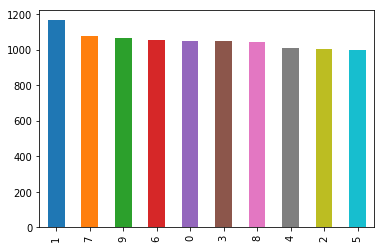

In [13]:
samples.label.value_counts().plot(kind='bar')
plt.show()

The data is evenly distributed in the random sample set 

### Data Preperation

- Creating X & y

In [14]:
X = samples.drop("label", axis = 1)
y = samples.label.values.astype(int)

- Normalize the data

We can normalize the data before test-train-split since all the pixel intensities lies between 0 to 255

In [15]:
from sklearn.preprocessing import scale
X = scale(X)

/Users/arpitjoshi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  


- Test Train split

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

- Check test-train split is balanced or not

In [17]:
print("Freq dist of y_train")
u, c = np.unique(y_train, return_counts=True)
print(np.asarray((u, (c/len(y_train))*100  )).T)

print("\n")

print("Freq dist of y_test")
u, c = np.unique(y_test, return_counts=True)
print(np.asarray((u, (c/len(y_test))*100 )).T)


Freq dist of y_train
[[ 0.         10.12244898]
 [ 1.         11.04761905]
 [ 2.          9.41496599]
 [ 3.          9.98639456]
 [ 4.          9.26530612]
 [ 5.          9.79591837]
 [ 6.          9.91836735]
 [ 7.         10.28571429]
 [ 8.          9.89115646]
 [ 9.         10.27210884]]


Freq dist of y_test
[[ 0.          9.71428571]
 [ 1.         11.17460317]
 [ 2.          9.84126984]
 [ 3.          9.96825397]
 [ 4.         10.41269841]
 [ 5.          8.73015873]
 [ 6.         10.22222222]
 [ 7.         10.15873016]
 [ 8.          9.93650794]
 [ 9.          9.84126984]]


### Model Building

- Defining KFolds

In [18]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

- Simple model to get rough idea of accuracy of model 
- Using `radial kernel (rbf)` since the data is pixel densities and geometry of handwritten is curvilinear

In [19]:
# instantiating a model
model = SVC()
cv_results = cross_val_score(model, X_train, y_train, cv = folds, scoring = 'accuracy') 

In [20]:
# print 5 accuracies obtained from the 5 folds
print(cv_results)
print("mean accuracy = {}".format(cv_results.mean()))

[0.93401361 0.92517007 0.93333333 0.91632653 0.92653061]
mean accuracy = 0.9270748299319728


`So the mean freq is above 90%`

- Model tunning using GridSearchCV

Hyperparameter values

`gamma=[1e-2, 1e-3, 1e-4]` FOR non-linearity

`C=[1, 10, 100, 1000]` FOR error

Using default `radial kernel (rbf)` since the data is pixel densities and geometry of handwritten is curvilinear

Using default `degree=3` 

In [21]:
# tune the model

# specify the number of folds for k-fold CV
n_folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# specify range of parameters C & gamma as a list
params = [ {'gamma': [1e-2, 1e-3, 1e-4], 'C': [1, 10, 100, 1000]}]

# create SVC object
linear_model = SVC()

# set up grid search scheme
model_cv = GridSearchCV(estimator = linear_model, 
                        param_grid = params, 
                        scoring= 'accuracy', 
                        cv = n_folds, 
                        verbose = 10,
                        return_train_score=True,
                        n_jobs=-1
                       )      



# fit the model on n_folds
model_cv.fit(X_train, y_train)



Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:  9.9min remaining:  3.6min
[Parallel(n_jobs=-1)]: Done  51 out of  60 | elapsed: 11.3min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done  58 out of  60 | elapsed: 11.8min remaining:   24.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 12.1min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=10)

- Result analysis

In [22]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,156.154144,0.899647,19.136267,0.118430,1,0.01,"{'C': 1, 'gamma': 0.01}",0.760544,0.729932,0.736054,0.741497,0.746939,0.742993,0.010436,12,1.000000,1.000000,1.000000,0.999830,1.000000,0.999966,0.000068
1,42.030708,0.328400,11.560057,0.062760,1,0.001,"{'C': 1, 'gamma': 0.001}",0.931973,0.923810,0.933333,0.915646,0.926531,0.926259,0.006347,4,0.972959,0.973639,0.972789,0.973469,0.971769,0.972925,0.000658
2,59.539344,1.077498,15.280568,0.080484,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.903401,0.900000,0.905442,0.880952,0.894558,0.896871,0.008771,8,0.913265,0.910374,0.909694,0.914286,0.911395,0.911803,0.001730
3,155.282466,0.870925,19.065709,0.450060,10,0.01,"{'C': 10, 'gamma': 0.01}",0.770748,0.751020,0.759184,0.755102,0.761905,0.759592,0.006687,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,33.186137,0.656508,10.209913,0.213415,10,0.001,"{'C': 10, 'gamma': 0.001}",0.940136,0.931293,0.938776,0.928571,0.936735,0.935102,0.004442,1,0.999660,0.999150,0.999490,0.999320,0.999490,0.999422,0.000173
5,27.033118,0.887489,9.762987,0.172780,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.930612,0.921769,0.923810,0.916327,0.917687,0.922041,0.005065,5,0.957313,0.958163,0.957313,0.960714,0.959354,0.958571,0.001307
6,159.605684,0.702774,19.470174,0.231884,100,0.01,"{'C': 100, 'gamma': 0.01}",0.770748,0.751020,0.759184,0.755102,0.761905,0.759592,0.006687,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,34.270565,0.844335,10.659219,0.146001,100,0.001,"{'C': 100, 'gamma': 0.001}",0.940136,0.927891,0.938095,0.928571,0.938776,0.934694,0.005322,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,19.782670,0.428896,8.049749,0.113878,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.935374,0.908844,0.920408,0.912925,0.920408,0.919592,0.009060,6,0.993197,0.993878,0.993197,0.994048,0.992517,0.993367,0.000548
9,154.400738,1.274922,17.618784,3.366465,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.770748,0.751020,0.759184,0.755102,0.761905,0.759592,0.006687,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


- Plotting C vs Mean train_score & test_score

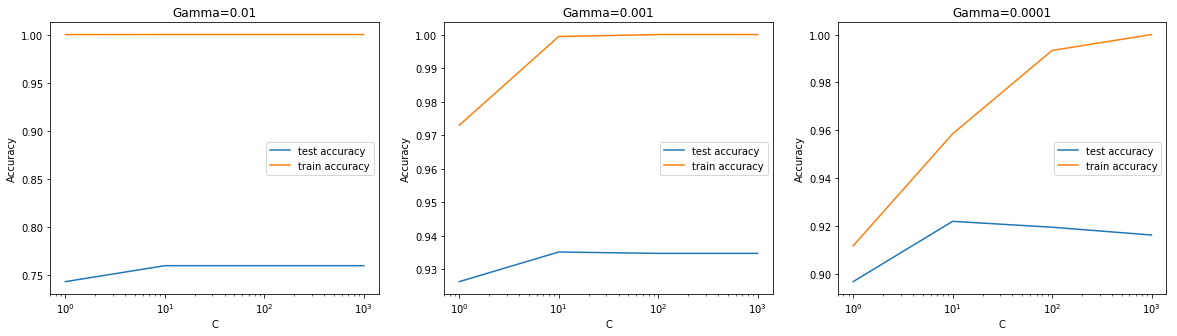

In [23]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

plt.figure(figsize=(20, 5))

cnt = 1
for gamma in params[0]['gamma']:
    
    plt.subplot(1, len(params[0]['gamma']), cnt)
    gamma_data = cv_results[cv_results['param_gamma']==gamma]
    plt.plot(gamma_data["param_C"], gamma_data["mean_test_score"])
    plt.plot(gamma_data["param_C"], gamma_data["mean_train_score"])
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    plt.title("Gamma="+str(gamma))
    plt.legend(['test accuracy', 'train accuracy'], loc='center right')
    plt.xscale('log')
    cnt=cnt+1

plt.show()


The best parameters selection

In [24]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']
best_gamma = model_cv.best_params_['gamma']


print(" The highest test accuracy is {0} at C = {1} AND gamma = {2}".format(best_score, best_C, best_gamma))

 The highest test accuracy is 0.9351020408163265 at C = 10 AND gamma = 0.001


- Creating final model from best hyper params achived by GridSearchCV

In [25]:
# model with the best value of C
model = SVC(C=best_C, gamma=best_gamma)

# fit
model.fit(X_train, y_train)



SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

- Prediction & accuracy on test set (held out samples)

In [26]:
# predict
y_pred = model.predict(X_test)

In [27]:
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

accuracy 0.9507936507936507


In [28]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       306
           1       0.98      0.99      0.98       352
           2       0.93      0.95      0.94       310
           3       0.95      0.95      0.95       314
           4       0.97      0.94      0.95       328
           5       0.97      0.91      0.94       275
           6       0.96      0.98      0.97       322
           7       0.90      0.96      0.93       320
           8       0.95      0.92      0.94       313
           9       0.92      0.90      0.91       310

   micro avg       0.95      0.95      0.95      3150
   macro avg       0.95      0.95      0.95      3150
weighted avg       0.95      0.95      0.95      3150



In [29]:
metrics.confusion_matrix(y_test, y_pred)

array([[303,   0,   0,   0,   0,   1,   1,   1,   0,   0],
       [  0, 349,   0,   0,   0,   0,   0,   2,   1,   0],
       [  1,   0, 296,   2,   1,   1,   1,   4,   4,   0],
       [  0,   1,   2, 298,   0,   1,   1,   4,   1,   6],
       [  1,   1,   5,   0, 307,   0,   1,   1,   1,  11],
       [  1,   2,   2,   3,   1, 250,   6,   2,   6,   2],
       [  1,   1,   1,   0,   0,   1, 317,   1,   0,   0],
       [  1,   1,   5,   1,   1,   0,   0, 308,   0,   3],
       [  0,   2,   5,   6,   0,   3,   3,   4, 289,   1],
       [  1,   0,   2,   4,   8,   1,   0,  15,   1, 278]])

`Accuracy on held out dataset is 0.9507`

### Prediction on random 10% of data from train.csv with after "removing rows of samples datafarme"

In [30]:
random_test_sample=data.drop(data.index[np.array(samples.index)]).sample(frac=0.10, random_state=100)

In [31]:
X_random_test_sample = random_test_sample.drop("label", axis = 1)
y_random_test_sample = random_test_sample.label.values.astype(int)


In [32]:
X_random_test_sample = scale(X_random_test_sample)

/Users/arpitjoshi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [33]:
y_pred_random_test_sample = model.predict(X_random_test_sample)

In [34]:
print("accuracy", metrics.accuracy_score(y_random_test_sample, y_pred_random_test_sample))

accuracy 0.9453968253968253


`Accuracy on random 10% data from train.csv is 0.9453`

## Prediction on Kaggle test data

- Importing test data

In [35]:
test=pd.read_csv("test.csv")

- check test data 

In [36]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,...,pixel534,pixel535,pixel536,pixel537,pixel538,pixel539,pixel540,pixel541,pixel542,pixel543,pixel544,pixel545,pixel546,pixel547,pixel548,pixel549,pixel550,pixel551,pixel552,pixel553,pixel554,pixel555,pixel556,pixel557,pixel558,pixel559,pixel560,pixel561,pixel562,pixel563,pixel564,pixel565,pixel566,pixel567,pixel568,pixel569,pixel570,pixel571,pixel572,pixel573,pixel574,pixel575,pixel576,pixel577,pixel578,pixel579,pixel580,pixel581,pixel582,pixel583,pixel584,pixel585,pixel586,pixel587,pixel588,pixel589,pixel590,pixel591,pixel592,pixel593,pixel594,pixel595,pixel596,pixel597,pixel598,pixel599,pixel600,pixel601,pixel602,pixel603,pixel604,pixel605,pixel606,pixel607,pixel608,pixel609,pixel610,pixel611,pixel612,pixel613,pixel614,pixel615,pixel616,pixel617,pixel618,pixel619,pixel620,pixel621,pixel622,pixel623,pixel624,pixel625,pixel626,pixel627,pixel628,pixel629,pixel630,pixel631,pixel632,pixel633,pixel634,pixel635,pixel636,pixel637,pixel638,pixel639,pixel640,pixel641,pixel642,pixel643,pixel644,pixel645,pixel646,pixel647,pixel648,pixel649,pixel650,pixel651,pixel652,pixel653,pixel654,pixel655,pixel656,pixel657,pixel658,pixel659,pixel660,pixel661,pixel662,pixel663,pixel664,pixel665,pixel666,pixel667,pixel668,pixel669,pixel670,pixel671,pixel672,pixel673,pixel674,pixel675,pixel676,pixel677,pixel678,pixel679,pixel680,pixel681,pixel682,pixel683,pixel684,pixel685,pixel686,pixel687,pixel688,pixel689,pixel690,pixel691,pixel692,pixel693,pixel694,pixel695,pixel696,pixel697,pixel698,pixel699,pixel700,pixel701,pixel702,pixel703,pixel704,pixel705,pixel706,pixel707,pixel708,pixel709,pixel710,pixel711,pixel712,pixel713,pixel714,pixel715,pixel716,pixel717,pixel718,pixel719,pixel720,pixel721,pixel722,pixel723,pixel724,pixel725,pixel726,pixel727,pixel728,pixel729,pixel730,pixel731,pixel732,pixel733,pixel734,pixel735,pixel736,pixel737,pixel738,pixel739,p

- Normalizing data

In [37]:
test = scale(test)

/Users/arpitjoshi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


- Predict results

In [38]:
results=model.predict(test)

- Creating output dataframe for Kaggle

In [39]:
output_df=pd.DataFrame({"ImageId": np.arange(1,test.shape[0]+1), "Label": results})

In [40]:
output_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3


Saving output_df to out_svm_kaggle.csv for kaggle submission

In [41]:
output_df.to_csv('out_svm_kaggle.csv', index=False, header=True)

### The accuracy on held-out from train.csv dataset is `0.9507`

### The accuracy on random 10% data from train.csv dataset with different random_state is `0.9453`

### The accuracy for test.csv after submitting to Kaggle is `0.94371`

# Conclusion

### Final model is giving accuracy of around ~94%